In [1]:
# importando librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns
import seaborn as sb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sbn

In [2]:
#leer los datos
d = pd.read_csv("carpetas_completa_febrero_2022.csv", sep=",", decimal='.')

C:\Users\ltirado\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
d.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN


In [4]:
d = d.drop_duplicates()
d

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401326,2022.0,Febrero,2022-02-28 06:26:00,2022,Febrero,2022-02-28 23:48:46,FRAUDE,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,PROLONGACION PASEO DE LA REFORMA,NaN,LOMAS DE SANTA FE,ALVARO OBREGON,FUERO COMUN,-99.240525,19.386986,NaN
1401327,2022.0,Febrero,2022-02-28 12:00:00,2022,Febrero,2022-02-28 23:52:02,ROBO A REPARTIDOR CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,UAT-IZC-2,UI-1SD,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,CALLE 7 ESQUINA ANA MARIA,NaN,AGRÍCOLA PANTITLAN,IZTACALCO,FUERO COMUN,-99.057760,19.405911,NaN
1401328,2021.0,Mayo,2021-05-05 09:00:00,2022,Febrero,2022-02-28 23:53:38,ROBO DE OBJETOS,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,RIACHUELO SERPENTINO,FAROLITO,SAN JOSÉ,TLAHUAC,FUERO COMUN,-98.994593,19.279794,NaN
1401329,2022.0,Febrero,2022-02-20 15:50:00,2022,Febrero,2022-02-28 23:57:03,ROBO DE VEHICULO DE PEDALES,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,CALZ ERMITA IZTAPALAPA,PERIFÉRICO ORIENTE,CONSTITUCIÓN DE 1917,IZTAPALAPA,FUERO COMUN,-99.063578,19.346178,NaN


In [5]:
df = d
df

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,GAVILLEROS,EMILIANO ZAPATA,IZTAPALAPA,NaN,-98.976379,19.331633,NaN
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,AVENIDA COLONIA DEL VALLE,DEL VALLE CENTRO,BENITO JUAREZ,NaN,-99.172189,19.387114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401326,2022.0,Febrero,2022-02-28 06:26:00,2022,Febrero,2022-02-28 23:48:46,FRAUDE,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,PROLONGACION PASEO DE LA REFORMA,NaN,LOMAS DE SANTA FE,ALVARO OBREGON,FUERO COMUN,-99.240525,19.386986,NaN
1401327,2022.0,Febrero,2022-02-28 12:00:00,2022,Febrero,2022-02-28 23:52:02,ROBO A REPARTIDOR CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,UAT-IZC-2,UI-1SD,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,CALLE 7 ESQUINA ANA MARIA,NaN,AGRÍCOLA PANTITLAN,IZTACALCO,FUERO COMUN,-99.057760,19.405911,NaN
1401328,2021.0,Mayo,2021-05-05 09:00:00,2022,Febrero,2022-02-28 23:53:38,ROBO DE OBJETOS,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,RIACHUELO SERPENTINO,FAROLITO,SAN JOSÉ,TLAHUAC,FUERO COMUN,-98.994593,19.279794,NaN
1401329,2022.0,Febrero,2022-02-20 15:50:00,2022,Febrero,2022-02-28 23:57:03,ROBO DE VEHICULO DE PEDALES,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,CALZ ERMITA IZTAPALAPA,PERIFÉRICO ORIENTE,CONSTITUCIÓN DE 1917,IZTAPALAPA,FUERO COMUN,-99.063578,19.346178,NaN


In [6]:
df.shape

(1401331, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401331 entries, 0 to 1401330
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1400873 non-null  float64
 1   mes_hechos            1400873 non-null  object 
 2   fecha_hechos          1400873 non-null  object 
 3   ao_inicio             1401331 non-null  int64  
 4   mes_inicio            1401331 non-null  object 
 5   fecha_inicio          1401328 non-null  object 
 6   delito                1401331 non-null  object 
 7   fiscalia              1401329 non-null  object 
 8   agencia               1401331 non-null  object 
 9   unidad_investigacion  1401104 non-null  object 
 10  categoria_delito      1401331 non-null  object 
 11  calle_hechos          1397390 non-null  object 
 12  calle_hechos2         539997 non-null   object 
 13  colonia_hechos        1340993 non-null  object 
 14  alcaldia_hechos       1397166 non-

In [8]:
#Porcentaje de registros nulos por columna
df.isna().sum() / 1401331 *100

ao_hechos                 0.032683
mes_hechos                0.032683
fecha_hechos              0.032683
ao_inicio                 0.000000
mes_inicio                0.000000
fecha_inicio              0.000214
delito                    0.000000
fiscalia                  0.000143
agencia                   0.000000
unidad_investigacion      0.016199
categoria_delito          0.000000
calle_hechos              0.281233
calle_hechos2            61.465421
colonia_hechos            4.305764
alcaldia_hechos           0.297217
competencia              75.933452
longitud                  4.238114
latitud                   4.238114
tempo                   100.000000
dtype: float64

La columna tempo contiene varias celdas con NaN. En este caso, faltan los datos. Además, tempo no proporciona ningún valor el análisis. La columna se puede descartar del marco de datos. Una manera de eliminar variables que no desea en un marco de datos es mediante la función del.

In [9]:
del df['tempo']
df.drop('competencia', axis=1, inplace=True )
df.drop('calle_hechos2', axis=1, inplace=True )

In [10]:
df.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'colonia_hechos', 'alcaldia_hechos',
       'longitud', 'latitud'],
      dtype='object')

### Análisis de datos

## 1. Información estadística de las variables 

In [11]:
# 1a. Delitos que van a la alza en la CDMX
df['categoria_delito'].value_counts(ascending=True) / 1401331 *100


PLAGIO O SECUESTRO                                          0.000071
FEMINICIDIO                                                 0.000143
SECUESTRO                                                   0.013773
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                    0.050238
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA               0.101546
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA     0.178616
ROBO A CASA HABITACIÓN CON VIOLENCIA                        0.242626
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA     0.326047
HOMICIDIO DOLOSO                                            0.554045
VIOLACIÓN                                                   0.591937
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO               0.689131
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA       0.848836
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       1.001334
ROBO A NEGOCIO CON VIOLENCIA                                1.585207
HECHO NO DELICTIVO                

In [12]:
# Se puede observar que los delitos en la categoría de bajo impacto son los más frecuentes con un 78% de afectación. Veamos cuales son los delitos que se encuentran en esta categoría
df_categorias = df.loc[df["categoria_delito"] == "DELITO DE BAJO IMPACTO"]
df_categorias

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451
5,2016.0,Febrero,2016-02-01 01:30:00,2016,Febrero,2016-02-01 02:19:12,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-3CD,DELITO DE BAJO IMPACTO,AV. CHAPULTEPEC,JUÁREZ,CUAUHTEMOC,-99.174075,19.421356
6,2016.0,Enero,2016-01-31 22:15:00,2016,Febrero,2016-02-01 03:15:11,LESIONES INTENCIONALES,INVESTIGACIÓN EN TLAHUAC,TLH-2,UI-3SD,DELITO DE BAJO IMPACTO,JUAN NEPOMUCENO DE REYES,SANTA CECILIA,TLAHUAC,-99.001595,19.279864
7,2012.0,Agosto,2012-08-16 12:00:00,2016,Febrero,2016-02-01 03:44:15,FRAUDE,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,DELITO DE BAJO IMPACTO,MONTECITO,NAPOLES,BENITO JUAREZ,-99.173480,19.394918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401325,2021.0,Febrero,2021-02-16 00:00:00,2022,Febrero,2022-02-28 23:48:03,ABUSO DE CONFIANZA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN AZCAP...,UAT-AZ-4,UI-1SD,DELITO DE BAJO IMPACTO,CERRO AZUL NUMERO 219 LOCAL 4,PETROLERA,AZCAPOTZALCO,-99.199735,19.487158
1401326,2022.0,Febrero,2022-02-28 06:26:00,2022,Febrero,2022-02-28 23:48:46,FRAUDE,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,PROLONGACION PASEO DE LA REFORMA,LOMAS DE SANTA FE,ALVARO OBREGON,-99.240525,19.386986
1401328,2021.0,Mayo,2021-05-05 09:00:00,2022,Febrero,2022-02-28 23:53:38,ROBO DE OBJETOS,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,RIACHUELO SERPENTINO,SAN JOSÉ,TLAHUAC,-98.994593,19.279794
1401329,2022.0,Febrero,2022-02-20 15:50:00,2022,Febrero,2022-02-28 23:57:03,ROBO DE VEHICULO DE PEDALES,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,CALZ ERMITA IZTAPALAPA,CONSTITUCIÓN DE 1917,IZTAPALAPA,-99.063578,19.346178


In [13]:
df_categorias['delito'].value_counts(ascending=True) / 1401331 *100

INJURIAS                               0.000071
CONTRA LA LEY FEDERAL DE POBLACION     0.000071
DESACATO                               0.000071
ASOCIACION DELICTUOSA                  0.000071
EJERCICIO INDEBIDO DEL PROPIO DER.     0.000071
                                        ...    
ROBO A NEGOCIO SIN VIOLENCIA           4.910189
AMENAZAS                               5.577769
ROBO DE OBJETOS                        5.807978
FRAUDE                                 6.449226
VIOLENCIA FAMILIAR                    10.822283
Name: delito, Length: 249, dtype: float64

Con lo anterior se puede concluir que el tipo de delito que más se cometió fue el delito de bajo impacto y en esta categoría lo más significativos son los delitos reacionados con violencia familiar 

In [14]:
# 1b. Delitos que van a la baja en la CDMX
df['categoria_delito'].value_counts(ascending=True) / 1401331 *100

PLAGIO O SECUESTRO                                          0.000071
FEMINICIDIO                                                 0.000143
SECUESTRO                                                   0.013773
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                    0.050238
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA               0.101546
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA     0.178616
ROBO A CASA HABITACIÓN CON VIOLENCIA                        0.242626
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA     0.326047
HOMICIDIO DOLOSO                                            0.554045
VIOLACIÓN                                                   0.591937
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO               0.689131
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA       0.848836
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       1.001334
ROBO A NEGOCIO CON VIOLENCIA                                1.585207
HECHO NO DELICTIVO                

Los delitos que van a la baja en la CDMX son aquellos que involucran plagio o secuestro, feminicidio, robos, homicidios dolosos, vilaciones y lesiones por disparo con arma de fuego. Estos representan un 3.5% de los delitos en CDMX para el tiempo de estudio

In [ ]:
#2. Alcaldía que más delitos tiene


Para analizar cuál es la alcaldía con más delitos se debe eliminar los n/a ya que alteran la información de estudio

In [15]:
alcaldia_ = df.loc[df.alcaldia_hechos.isna() == True]
alcaldia_

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
889,2008.0,Enero,2008-01-17 03:00:00,2016,Febrero,2016-02-06 02:57:41,TORTURA,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-2CD,DELITO DE BAJO IMPACTO,NO REFIERE LUGAR DE HECHOS,NaN,NaN,NaN,NaN
1437,2012.0,Julio,2012-07-27 12:00:00,2016,Febrero,2016-02-09 14:10:00,DENUNCIA DE HECHOS,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-3,UI-3SD,HECHO NO DELICTIVO,TIJUANA,NaN,NaN,NaN,NaN
1576,2015.0,Agosto,2015-08-18 17:00:00,2016,Febrero,2016-02-10 04:02:38,TORTURA,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-3CD,DELITO DE BAJO IMPACTO,NO REFIERE LUGAR DE HECHOS,NaN,NaN,NaN,NaN
1686,2016.0,Febrero,2016-02-09 21:30:00,2016,Febrero,2016-02-10 18:11:44,ABUSO DE AUTORIDAD,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-1CD,DELITO DE BAJO IMPACTO,NO REFIERE LUGAR DE HECHOS,NaN,NaN,NaN,NaN
2144,2015.0,Julio,2015-07-28 19:30:00,2016,Febrero,2016-02-13 02:25:01,TORTURA,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,B,UI-3CD,DELITO DE BAJO IMPACTO,NO REFIERE LUGAR DE HECHOS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400369,2022.0,Febrero,2022-02-27 14:00:00,2022,Febrero,2022-02-27 16:15:23,LESIONES INTENCIONALES POR ARMA DE FUEGO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-9,UI-2SD,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,HECHOS OCURRIDOS EN EL ESTADO DE MEXICO,NaN,NaN,NaN,NaN
1400395,2022.0,Febrero,2022-02-27 14:30:00,2022,Febrero,2022-02-27 17:16:55,PERDIDA DE LA VIDA POR OTRAS CAUSAS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,UAT-GAM-4,UI-1SD,HECHO NO DELICTIVO,NOT. HOSP. PEDIATRICO LA VILLA,NaN,NaN,NaN,NaN
1400429,2022.0,Febrero,2022-02-27 16:30:00,2022,Febrero,2022-02-27 18:16:17,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,SE DESCONOCE ESTACION DONDE OCURRIO EL ROBO,NaN,NaN,NaN,NaN
1400841,2022.0,Febrero,2022-02-25 06:30:00,2022,Febrero,2022-02-28 13:42:47,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,NO PRECISA LUGAR EXACTO DEL ROBO,NaN,NaN,NaN,NaN


In [16]:
alcaldia_ = df.dropna()
alcaldia_

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,colonia_hechos,alcaldia_hechos,longitud,latitud
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451
3,2016.0,Enero,2016-01-31 22:00:00,2016,Febrero,2016-02-01 02:09:11,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-6,UI-3CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,GERANIO,EMILIANO ZAPATA,IZTAPALAPA,-98.976379,19.331633
4,2015.0,Diciembre,2015-12-25 12:00:00,2016,Febrero,2016-02-01 02:16:49,DENUNCIA DE HECHOS,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-3SD,HECHO NO DELICTIVO,SAN FRANCISCO,DEL VALLE CENTRO,BENITO JUAREZ,-99.172189,19.387114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401326,2022.0,Febrero,2022-02-28 06:26:00,2022,Febrero,2022-02-28 23:48:46,FRAUDE,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,PROLONGACION PASEO DE LA REFORMA,LOMAS DE SANTA FE,ALVARO OBREGON,-99.240525,19.386986
1401327,2022.0,Febrero,2022-02-28 12:00:00,2022,Febrero,2022-02-28 23:52:02,ROBO A REPARTIDOR CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,UAT-IZC-2,UI-1SD,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,CALLE 7 ESQUINA ANA MARIA,AGRÍCOLA PANTITLAN,IZTACALCO,-99.057760,19.405911
1401328,2021.0,Mayo,2021-05-05 09:00:00,2022,Febrero,2022-02-28 23:53:38,ROBO DE OBJETOS,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,RIACHUELO SERPENTINO,SAN JOSÉ,TLAHUAC,-98.994593,19.279794
1401329,2022.0,Febrero,2022-02-20 15:50:00,2022,Febrero,2022-02-28 23:57:03,ROBO DE VEHICULO DE PEDALES,AGENCIA DE DENUNCIA DIGITAL,CEN-1,Unidad de Investigación 1 S/D,DELITO DE BAJO IMPACTO,CALZ ERMITA IZTAPALAPA,CONSTITUCIÓN DE 1917,IZTAPALAPA,-99.063578,19.346178


In [17]:
alcaldia = alcaldia_['alcaldia_hechos'].value_counts(ascending=True) 
alcaldia

MILPA ALTA                 10057
CUAJIMALPA DE MORELOS      20693
LA MAGDALENA CONTRERAS     22954
TLAHUAC                    33929
XOCHIMILCO                 43092
IZTACALCO                  57529
AZCAPOTZALCO               67282
VENUSTIANO CARRANZA        77600
TLALPAN                    80483
MIGUEL HIDALGO             88276
COYOACAN                   91924
ALVARO OBREGON             92199
BENITO JUAREZ             112103
GUSTAVO A MADERO          136176
IZTAPALAPA                199638
CUAUHTEMOC                204204
Name: alcaldia_hechos, dtype: int64

Así, las alcaldias en las que más se presentaron delitos son las alcaldias de Benito Juarez, Gustavo A Madero, Iztapalapa y Cuauhtemoc esto puede ocurrir por políticas públicas de seguridad que no cubren de forma eficiente las necesitadas en torno a la población 

# Identificación de estacionalidad

In [18]:
alcaldia_["ao_hechos"] = alcaldia_["ao_hechos"].astype("int64")

<ipython-input-18-e9a7e487b2c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcaldia_["ao_hechos"] = alcaldia_["ao_hechos"].astype("int64")


In [19]:
# Se identifican solo las columnas necesarias

df_est = alcaldia_[['ao_hechos','mes_hechos', 'delito']]
df_est

,ao_hechos,mes_hechos,delito
0,2016,Enero,DAÑO EN PROPIEDAD AJENA INTENCIONAL
1,2016,Enero,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...
2,2016,Febrero,NARCOMENUDEO POSESION SIMPLE
3,2016,Enero,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
4,2015,Diciembre,DENUNCIA DE HECHOS
...,...,...,...
1401326,2022,Febrero,FRAUDE
1401327,2022,Febrero,ROBO A REPARTIDOR CON VIOLENCIA
1401328,2021,Mayo,ROBO DE OBJETOS
1401329,2022,Febrero,ROBO DE VEHICULO DE PEDALES


In [21]:
df_est = df_est.set_index("mes_hechos", "ao_hechos")
df_est

,ao_hechos,delito
mes_hechos,,
Enero,2016,DAÑO EN PROPIEDAD AJENA INTENCIONAL
Enero,2016,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...
Febrero,2016,NARCOMENUDEO POSESION SIMPLE
Enero,2016,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
Diciembre,2015,DENUNCIA DE HECHOS
...,...,...
Febrero,2022,FRAUDE
Febrero,2022,ROBO A REPARTIDOR CON VIOLENCIA
Mayo,2021,ROBO DE OBJETOS


In [20]:
df_est1 = df_est.groupby(by = ["ao_hechos", "mes_hechos"]).agg({'delito':'count'})
df_est1

delito
ao_hechos mes_hechos        
1906      Junio            1
1915      Enero            1
          Septiembre       1
1917      Septiembre       1
1930      Febrero          1
...                      ...
2021      Noviembre    16830
          Octubre      17759
          Septiembre   16482
2022      Enero        13895
          Febrero      12522

[525 rows x 1 columns]

In [22]:
df_est = df_est.groupby(["mes_hechos"]).agg({'delito': 'count'})
df_est.reset_index()

,mes_hechos,delito
0,Abril,103071
1,Agosto,112352
2,Diciembre,106536
3,Enero,122046
4,Febrero,118865
5,Julio,107618
6,Junio,106064
7,Marzo,114286
8,Mayo,110182
9,Noviembre,110718


In [31]:
df_est.mean()

delito    111511.583333
dtype: float64

In [27]:
df_est1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 525 entries, (1906, 'Junio') to (2022, 'Febrero')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   delito  525 non-null    int64
dtypes: int64(1)
memory usage: 5.9+ KB


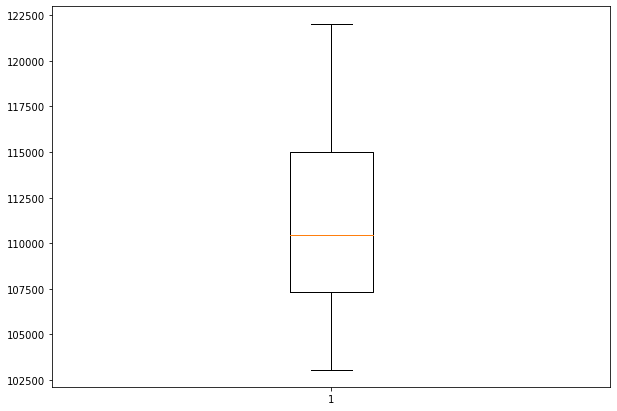

In [23]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot(df_est) 
  
plt.show() 

No se genera presencia de estacionalidad

In [37]:
#Indicados: registrar una cantidad determinada de delitos, si está por debajo del promedio se determina que hay baja  criminalidad
indicador  =  False;
for var in range(1,2):
	num = int(input("Cantidad de delitos:"))
	if num > 111511:
		indicador  = True
if indicador:
	print("Alto número de delitos")
else:
	print("Delitos por debajo del promedio")

Cantidad de delitos:44546
Delitos por debajo del promedio
